In [ ]:
!pip install sklearn2pmml
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns
import random
import string
from termcolor import colored as cl # text customizationsize=len(R_7['V26'])
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint,History
import pickle, math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef,confusion_matrix, roc_curve, auc,precision_recall_curve, balanced_accuracy_score, roc_auc_score
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn import metrics
import time


In [ ]:
path = 'final.xlsx'

In [ ]:
# Load the credit card transaction data 
df = pd.read_excel(path, dtype = str)

In [ ]:
cp = pd.DataFrame.copy(df)

In [ ]:
performance = []

In [ ]:
data = pd.read_excel("preprocessing_data.xlsx")
X=data.drop(['CLASS'],axis=1)
y=data['CLASS']
models = ['LogisticRegression','K nearest Neighbour','Linear Discriminant Analysis','Support Vector Machines','Decision Tree','Random Foreset','Extra Trees','Gausian Naive bayes','eExtreme gradient boosting']
def RunModel(model, X_train, y_train, X_test, y_test,i):
    #Training the model
    m = model.fit(X_train,y_train) 
    start_time = time.time()  # record start time 
    # Prédire les classes pour les données de test
    pred = model.predict(X_test)
    end_time = time.time()  # record end time
    time_taken = end_time - start_time  # calculate time taken
    accuracy_s = accuracy_score(y_test, pred) # calculate performance score
    recall_s = recall_score(pred, y_test,average='macro') #Recall score
    f1_s = f1_score(y_test, pred,average='macro')
    performance.append({'Model': models[i], 'Accuracy': accuracy_s, 'Recall': recall_s, 'F1': f1_s, 'time': time_taken})  # record performance
    # Plot No_normalized confusion matrix
    skplt.metrics.plot_confusion_matrix(y_test, pred)
    # Plot normalized confusion matrix
    skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True,title='Normalized confusion matrix')
    print('Model :',model)
    print('Accuracy : ',accuracy_s)
    print (classification_report(y_test, pred))
    return model
def ROC(model, X_train, y_train, X_test, y_test):
    #Training the model
    m = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    y_pred_probability = model.predict_proba(X_test)[::,1]
    # Calculer la courbe ROC et l'AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
    roc_auc = auc(fpr, tpr)
    # Afficher la courbe ROC
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbe ROC')
    plt.legend(loc="lower right")
    plt.show()

## Cleaning

In [ ]:
def clean_data(df):
    #Date
    count_V3 = df.loc[df['CLASS'] == 1,'V3'].isnull().sum()
    
    df['V23'] = pd.to_datetime(df['V23'],format="%d/%m/%Y")
    df['V8'] = pd.to_datetime(df['V8'],format="%d/%m/%Y %H:%M:%S")
    
    df['V6'] = pd.to_datetime(df['V6'],format="%d/%m/%Y")
    df['V7'] = pd.to_datetime(df['V7'],format="%d/%m/%Y")
    df['V6']=df['V6'].fillna(value=df['V7'] - pd.Timedelta(days=2*365))
   
    #String
    df['V4']=df['V4'].fillna(value='010112')
    df.loc[df['V1'] == 31, 'V10'] = '00'  
    values_V3 =  np.random.choice(["002", "003"],size=count_V3).tolist()
    df['V3'] = df['V3'].apply(lambda x: values_V3.pop(0) if pd.isna(x) else x)
    df['V19'] = df['V19'].apply(lambda x: ''.join(random.choices(string.digits, k=6)) if pd.isna(x) else x)
    #Float
    df = add_amount_values(pd.DataFrame.copy(df))
    return df

def add_amount_values(df):
    fload_cols=['V9','V10','V24']
    for el in fload_cols:
        df[el] = df[el].astype(float)
        max_V10 = df[el].max()
        values = [random.randint(0, max_V10) for i in range(df[el].isnull().sum() )]
        df[el] = df[el].apply(lambda x: values.pop(0) if pd.isna(x) else x)
    return df


In [ ]:
df['CLASS'] = df['CLASS'].astype(int)
df.drop(['V11','V14','V20','V5','V17','V18','V15'], axis=1, inplace=True)

In [ ]:
df = clean_data(pd.DataFrame.copy(df))

In [ ]:
df.head(2)

,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,...,V16,V19,V21,V22,V23,V24,V25,V26,V27,CLASS
0,31,281,22,010112,2009-05-01,2011-05-01,2009-07-02 21:21:42,733927.0,237437.0,010112,...,21140121124C,071181,01000002,01000002,2009-12-26,275044.0,952,384,VERSUS BANK 2 PLATEAUX REGION LAGUNECI,0
1,31,281,22,010112,2009-06-01,2011-06-01,2009-06-26 11:16:47,96716.0,353366.0,010112,...,21140121124C,004737,01000001,01000001,2009-12-26,542885.0,952,384,VERSUS BANK PLATEAU REGION LAGUNECI,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140654 entries, 0 to 140653
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   V1      140654 non-null  object        
 1   V2      140654 non-null  object        
 2   V3      140654 non-null  object        
 3   V4      140654 non-null  object        
 4   V6      140654 non-null  datetime64[ns]
 5   V7      140654 non-null  datetime64[ns]
 6   V8      140654 non-null  datetime64[ns]
 7   V9      140654 non-null  float64       
 8   V10     140654 non-null  float64       
 9   V12     140654 non-null  object        
 10  V13     140654 non-null  object        
 11  V16     140654 non-null  object        
 12  V19     140654 non-null  object        
 13  V21     140654 non-null  object        
 14  V22     140654 non-null  object        
 15  V23     140654 non-null  datetime64[ns]
 16  V24     140654 non-null  float64       
 17  V25     140654 non-null  obje

In [ ]:
import os

try:
    os.remove("clean_data.xlsx")
except:
    pass

df.to_excel("clean_data.xlsx", index=False)

## Preprocessing

In [ ]:


def update_dtype(df):
    df['CLASS'] = df['CLASS'].astype(int)
    df['V10'] = df['V10'].astype(float)
    df['V9'] = df['V9'].astype(float)
    df['V24'] = df['V24'].astype(float)
    return df

#Object preprocessing 
def to_categorical(v_df):
    cols= v_df.select_dtypes(include=['object'])
    obj_cols=cols.columns.to_list()

    for col in obj_cols:
        check=len(v_df[col].unique())
        print(str(col)+" ",check)
        le = LabelEncoder()
        v_df[col] = le.fit_transform(v_df[col])
    return v_df

#Object preprocessing 
def to_labels(v_df):
    
    cols = v_df.select_dtypes(include=['object'])
    obj_cols = cols.columns.to_list()
    dict_all = dict(zip([], []))
    ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',
                                    unknown_value=-1)

    for col in obj_cols:
        # Fit & Transform features + save encoder as dict for future saving
        temp_keys = v_df[col].values
        temp_values = ordinal_encoder.fit_transform(v_df[col].values.reshape(-1, 1))
        temp_values = temp_values.reshape(140654).astype(int)
        v_df[col] = np.array(temp_values)
        dict_temp = dict(zip(temp_keys, temp_values))
        dict_all[col] = dict_temp

    for col in obj_cols:
        v_df.replace(dict_all[col], inplace=True)
    
    # saving dictionary for deploy use
    file = open("dict_all.obj","wb")
    pickle.dump(dict_all,file)
    file.close()

    return v_df, dict_all

def process_date(df):
    #DATETIME
    list=['V6','V7','V23','V8']
    date_columns = df.filter(list)
    year_columns = pd.DataFrame()
    
    for l in list:
        date_columns[l] = pd.to_datetime(date_columns[l])
        date_columns[l+'_month'] = date_columns[l].dt.month    
        date_columns[l+'_day'] = date_columns[l].dt.day.astype(int)
        year_columns[l+'_year'] = date_columns[l].dt.year

    #print(date_columns.columns)
    date_columns.drop(list, axis=1, inplace=True)
    df.drop(list, axis=1, inplace=True)

    cos_cols = np.array(date_columns.columns.values)
    sin_cols = np.array(date_columns.columns.values)

    for i in range(len(cos_cols)):
        cos_cols[i] = 'COS(' + cos_cols[i] + ')'
        sin_cols[i] = 'SIN(' + sin_cols[i] + ')'

    # Normalize date cols
    min_max_scaler = MinMaxScaler(feature_range=(-math.pi, math.pi - (2*math.pi)/31 ))
    date_columns_scaled = min_max_scaler.fit_transform(date_columns.values)
    date_columns_cos = pd.DataFrame(date_columns_scaled, columns=cos_cols)
    date_columns_sin = pd.DataFrame(date_columns_scaled, columns=sin_cols)
    date_columns_cos = date_columns_cos.applymap(lambda x: math.cos(x))
    date_columns_sin = date_columns_sin.applymap(lambda x: math.sin(x))

    # saving scaler for deploy use
    scalerfile = "scaler.sav"
    pickle.dump(min_max_scaler, open(scalerfile, 'wb'))

    new_df = pd.concat([df, date_columns_cos, date_columns_sin, year_columns], axis=1)
    return new_df, min_max_scaler

In [ ]:
df = pd.read_excel("clean_data.xlsx", dtype = str)

In [ ]:
df_final = update_dtype(pd.DataFrame.copy(df))

In [ ]:
df_final, _ = process_date(pd.DataFrame.copy(df_final))

In [ ]:
cols = df_final.select_dtypes(include=['object'])

In [ ]:
df_final, _ = to_labels(df_final)

In [ ]:
# putting CLASS column at the end

isFraud = df_final.filter(['CLASS'],  axis=1)
df_final.drop(['CLASS'], axis=1, inplace=True)
df_final = pd.concat([df_final, isFraud], axis=1)
df_final.head()

,V1,V2,V3,V4,V9,V10,V12,V13,V16,V19,...,SIN(V7_day),SIN(V23_month),SIN(V23_day),SIN(V8_month),SIN(V8_day),V6_year,V7_year,V23_year,V8_year,CLASS
0,4,2,23,1,733927.0,237437.0,14,2916,45,20324,...,7.657137e-16,0.201299,0.937752,0.174152,-0.201299,2009,2011,2009,2009,0
1,4,2,23,1,96716.0,353366.0,14,2916,45,1353,...,7.657137e-16,0.201299,0.937752,-0.368810,0.937752,2009,2011,2009,2009,0
2,4,2,23,1,287688.0,462160.0,14,2916,45,25334,...,7.657137e-16,0.201299,0.937752,0.174152,-0.394356,2008,2009,2009,2009,0
3,4,2,23,1,546259.0,429852.0,14,2916,45,24537,...,7.657137e-16,0.201299,0.937752,0.174152,-0.571268,2009,2011,2009,2009,0
4,4,2,23,1,312958.0,181778.0,14,2916,45,16970,...,7.657137e-16,0.201299,0.937752,0.174152,-0.571268,2008,2010,2009,2009,0


In [ ]:
try:
    os.remove("preprocessing_data.xlsx")
except:
    pass

df_final.to_excel("preprocessing_data.xlsx", index=False)

# Data After Cleaning & preprocessing

In [ ]:
data = pd.read_excel("preprocessing_data.xlsx")

In [ ]:
data.isnull().sum()

V1           0
V2           0
V3           0
V4           0
V9           0
V10          0
V12          0
V13          0
V16          0
V19          0
V21          0
V22          0
V24          0
V25          0
V26          0
V27          0
CLASS        0
V6_month     0
V6_day       0
V7_month     0
V7_day       0
V23_month    0
V23_day      0
V8_month     0
V8_day       0
V6_year      0
V7_year      0
V23_year     0
V8_year      0
dtype: int64

In [ ]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
V1,140654.0,3.192551,1.371817,0.0,1.00,4.0,4.00,6.0
V2,140654.0,1.796700,0.405518,0.0,2.00,2.0,2.00,3.0
V3,140654.0,23.060084,3.870222,0.0,23.00,23.0,23.00,100.0
V4,140654.0,1.013587,0.130981,0.0,1.00,1.0,1.00,2.0
V9,140654.0,333972.282367,244468.626444,3.0,105444.25,300000.0,546723.25,800000.0


In [ ]:
data.shape

(140654, 29)

In [ ]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V9', 'V10', 'V12', 'V13', 'V16', 'V19', 'V21',
       'V22', 'V24', 'V25', 'V26', 'V27', 'CLASS', 'V6_month', 'V6_day',
       'V7_month', 'V7_day', 'V23_month', 'V23_day', 'V8_month', 'V8_day',
       'V6_year', 'V7_year', 'V23_year', 'V8_year'],
      dtype='object')

In [ ]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, size=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

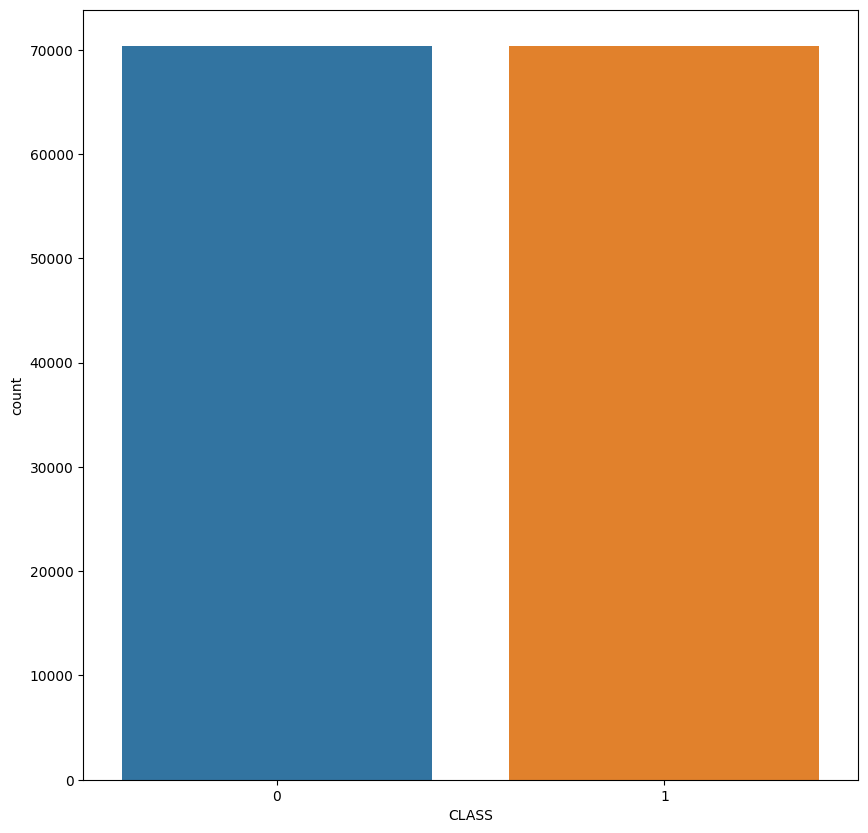

In [ ]:
countplot_data(data, data.CLASS)



# Logistic regression


With the dataset defined, separating the input variables from the target variable, we divided the data into training and test sets, importing the train_test_split function.

The train_test_split function uses a randomizer to separate data into training and test sets. In this case, 70% of the data for training and 30% for tests were defined.

The random seed (np.random.seed) is used to ensure that the same data is used for all runs.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)


In [ ]:
#Building the Regression Logistic model
lr=LogisticRegression()

Model : LogisticRegression()
Accuracy :  0.6393582482166978
              precision    recall  f1-score   support

           0       0.63      0.67      0.65     21150
           1       0.65      0.61      0.63     21047

    accuracy                           0.64     42197
   macro avg       0.64      0.64      0.64     42197
weighted avg       0.64      0.64      0.64     42197



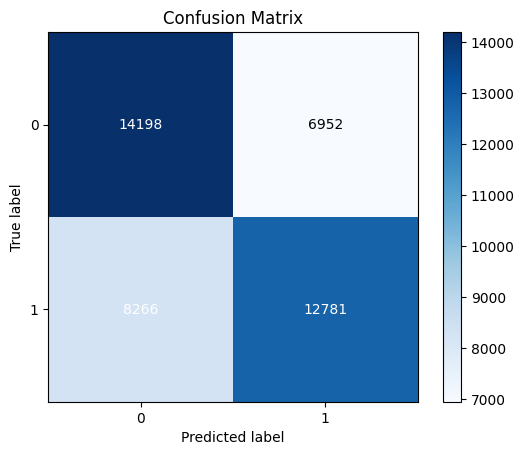

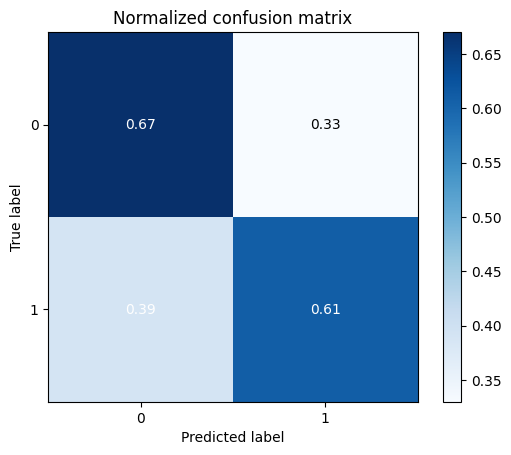

In [ ]:
model = RunModel(lr,X_train,y_train, X_test,y_test,0)

In [ ]:
from joblib import dump
# Save the trained model to a file
dump(model, 'LogisticRegression.joblib')

['LogisticRegression.joblib']

With the Logistic Regression Model, we have:

14321 transactions classified as normal and were actually normal;

6829 transactions classified as fraud but that were really normal (type 1 error);

8284 transactions classified as normal but which were fraud (type 2 error);

12763 transactions classified as fraud and were actually fraud.




The "ROC" curve is a probability curve that shows how much the classifier can distinguish between two things, through two parameters: the true-positive rate versus the false-positive rate, that is, the number of times the classifier hit the prediction against the number of times the classifier missed the prediction.

The "AUC" is derived from the "ROC" curve and represents the degree or measure of separability. The AUC summarizes the ROC curve in a single value, calculating the “area under the curve”. The higher the AUC the better the model is in predicting 0s as 0s and 1s as 1s. In this case, the higher the AUC the better the model is in distinguishing between fraudulent and normal transactions. The AUC value ranges from 0.0 to 1.0.

An excellent model has AUC close to 1, which means it has a good measure of separability. A poor model has AUC close to 0, which means that it has the worst measure of separability, that is, it is predicting 0s as 1s and 1s as 0s. And when the AUC is 0.5, it means that the model has no class separation capability.

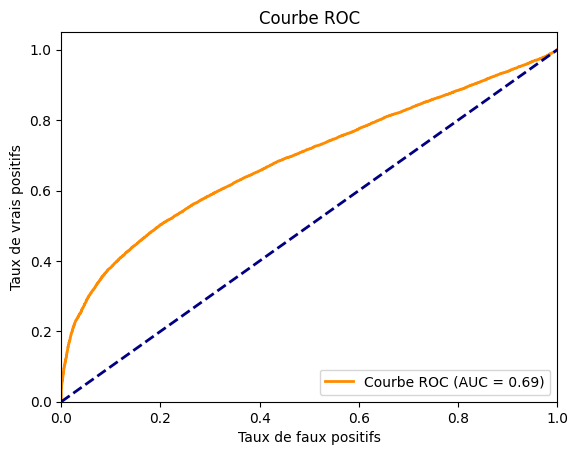

In [ ]:
ROC(lr,X_train,y_train, X_test,y_test)

An AUC of 0.64 is better than a random guess (AUC of 0.5), but it is not considered a good result. Generally, an AUC value above 0.7 is considered acceptable, while an AUC value above 0.8 is considered good.

# K nearest Neighbour

**K-Nearest Neighbors(KNN)**
K- Nearest Neighbors is a

->Supervised machine learning algorithm as target variable is known.

->Non parametric as it does not make an assumption about the underlying data distribution pattern.

->Lazy algorithm as KNN does not have a training step. All data points will be used only at the time of prediction. With no training step, prediction step is costly. An eager learner algorithm eagerly learns during the training step.

->Used for both Classification and Regression.

->Uses feature similarity to predict the cluster that the new point will fall into.

**What is K is K nearest neighbors?**
K is a number used to identify similar neighbors for the new data point.

Referring to our example of friend circle in our new neighborhood. We select 3 neighbors that we want to be very close friends based on common thinking or hobbies. In this case K is 3.

KNN takes K nearest neighbors to decide where the new data point with belong to. This decision is based on feature similarity.

**How do we chose the value of K?**
**Grid Search:** This involves trying out different values of K and selecting the one that gives the best performance on a validation set. The performance metric can be accuracy, precision, recall, F1-score or any other metric that is suitable for the problem at hand.

In [ ]:
# Load the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

# Define the range of values for K
param_grid = {'n_neighbors': range(1, 20)}

# Create a KNN classifier
knn = KNeighborsClassifier()

print(X_train.shape) # Affiche la dimension de X_train
print(X_test.shape) # Affiche la dimension de X_test


# Perform grid search to find the best value of K
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Print the best value of K and the corresponding F1-score
print("Best value of K: ", grid_search.best_params_['n_neighbors'])
print("Best F1-score: ", grid_search.best_score_)


(112523, 28)
(28131, 28)
Best value of K:  9
Best F1-score:  0.6288140357608999


In [ ]:
# Créer un classifieur KNN
knn = KNeighborsClassifier(n_neighbors=9)

Model : KNeighborsClassifier(n_neighbors=9)
Accuracy :  0.6605208901106714
              precision    recall  f1-score   support

           0       0.64      0.75      0.69     21150
           1       0.69      0.57      0.63     21047

    accuracy                           0.66     42197
   macro avg       0.67      0.66      0.66     42197
weighted avg       0.67      0.66      0.66     42197



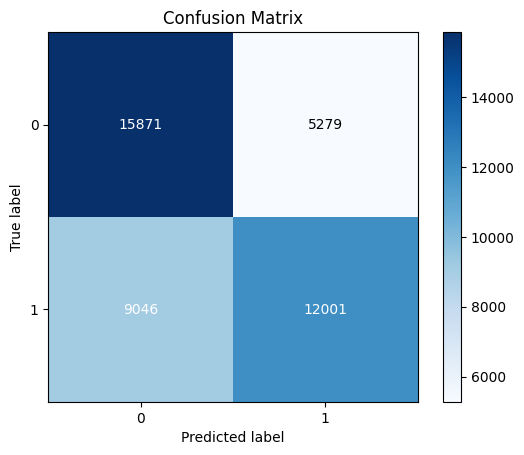

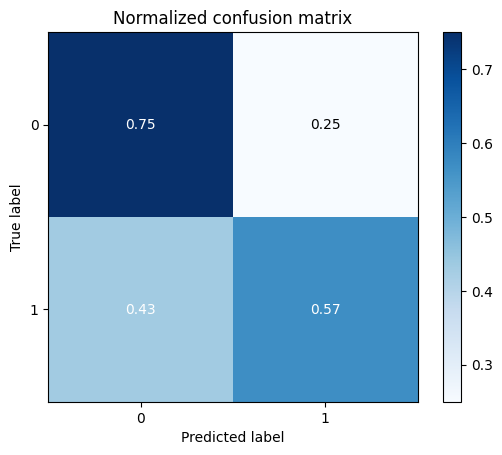

In [ ]:
model = RunModel(knn,X_train,y_train, X_test,y_test,1)

In [ ]:
# Save the trained model to a file
dump(model, 'KNN.joblib')

['KNN.joblib']

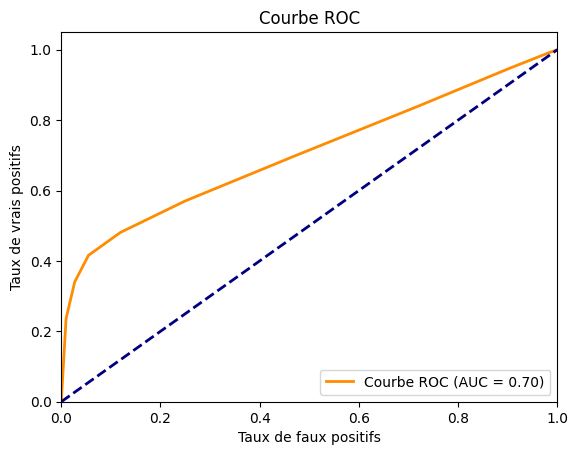

In [ ]:
ROC(knn,X_train,y_train, X_test,y_test)

# Linear Discriminant Analysis

In [ ]:
# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Créer un objet LDA et entraîner le modèle avec les données de formation
lda = LDA()

Model : LinearDiscriminantAnalysis()
Accuracy :  0.7762255163342932
              precision    recall  f1-score   support

           0       0.70      0.96      0.81     13961
           1       0.93      0.60      0.73     14170

    accuracy                           0.78     28131
   macro avg       0.82      0.78      0.77     28131
weighted avg       0.82      0.78      0.77     28131



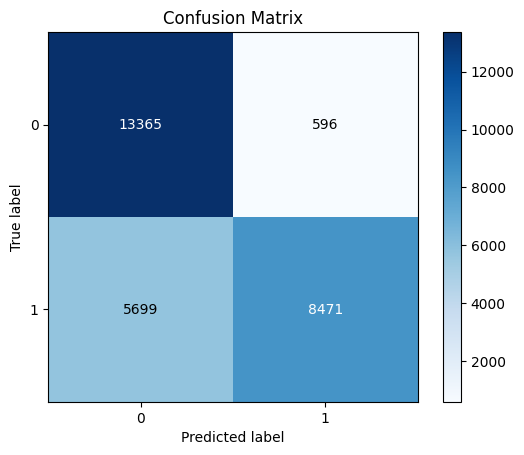

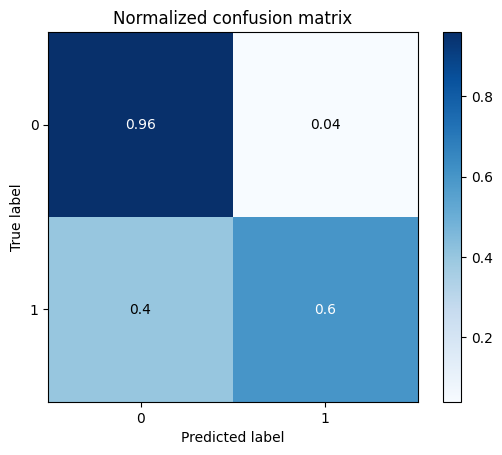

In [ ]:
model = RunModel(lda,X_train,y_train, X_test,y_test,2)

In [ ]:
dump(model, 'LDA.joblib')

['LDA.joblib']

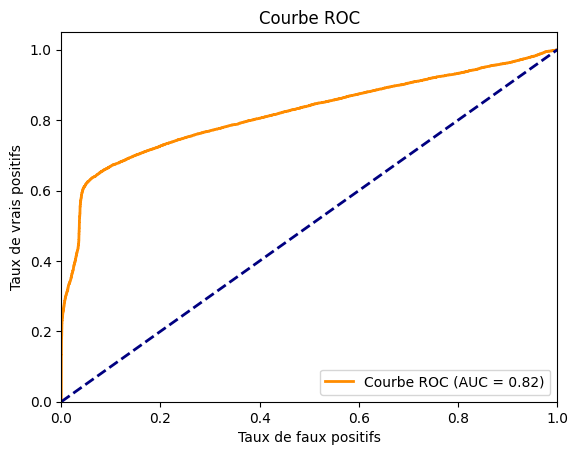

In [ ]:
ROC(lda,X_train,y_train, X_test,y_test)

# Support Vector Machines

In [ ]:
X_cols = data.drop("CLASS", axis=1).columns.values

X = X.values
y = y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
len(X_train)

94238

In [ ]:
## Train the model with PMML wraper
clf = PMMLPipeline(
    [
        (
            "Standard Scaler",
            StandardScaler()
        )
        ,
        (
            "SVM",
            SVC(gamma='auto')
        )
    ]
)

X_train = pd.DataFrame(X_train, columns = list(X_cols))
y_train = pd.Series(y_train, name = "isFraud")
X_test = pd.DataFrame(X_test, columns = list(X_cols))
y_test = pd.Series(y_test, name = "isFraud")

# Train the model
#clf.fit(X_train, y_train)

Model : PMMLPipeline(steps=[('Standard Scaler', StandardScaler()),
       ('SVM', SVC(gamma='auto'))])
Accuracy :  0.9012194071009997
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     23258
           1       0.99      0.81      0.89     23158

    accuracy                           0.90     46416
   macro avg       0.91      0.90      0.90     46416
weighted avg       0.91      0.90      0.90     46416



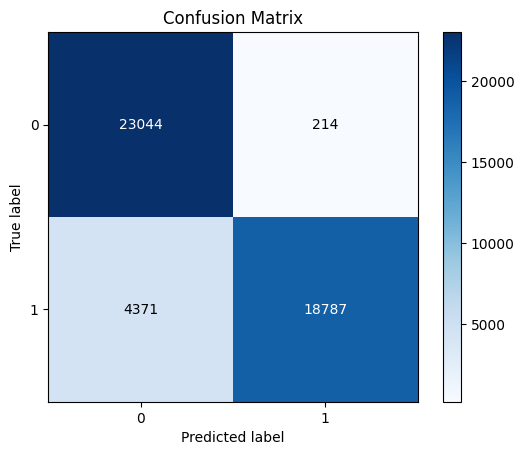

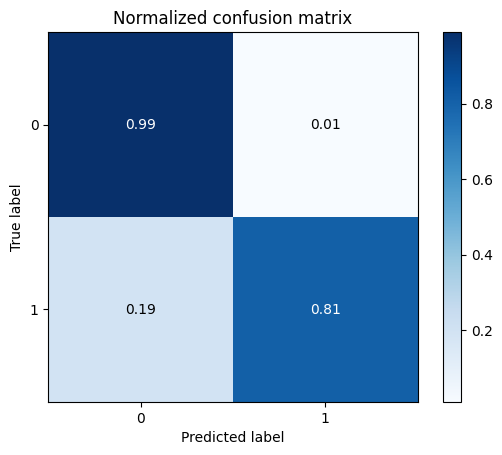

In [ ]:
# Train the model
model = RunModel(clf,X_train,y_train, X_test,y_test,3)

In [ ]:
# Save the trained model to a file
dump(model, 'SVM.joblib')

['SVM.joblib']

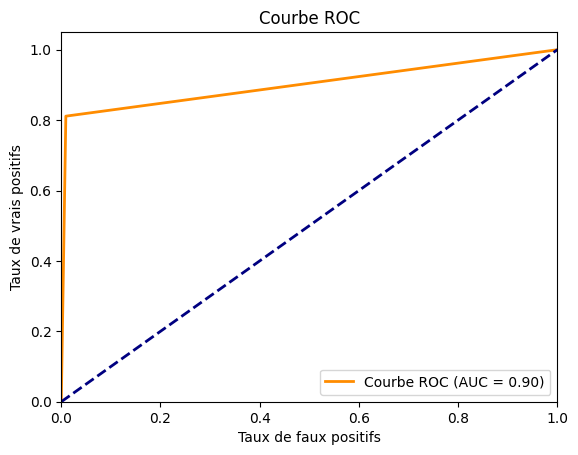

In [ ]:
#Training the model
#m = model.fit(X_train,y_train) 
pred = clf.predict(X_test)
# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
# Afficher la courbe ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [ ]:
from pandas.core.frame import Dtype
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Dt = DecisionTreeClassifier()


Model : DecisionTreeClassifier()
Accuracy :  0.9438342042586471
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14113
           1       0.94      0.95      0.94     14018

    accuracy                           0.94     28131
   macro avg       0.94      0.94      0.94     28131
weighted avg       0.94      0.94      0.94     28131



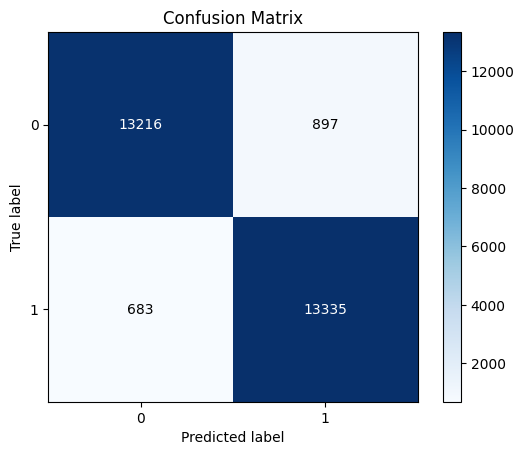

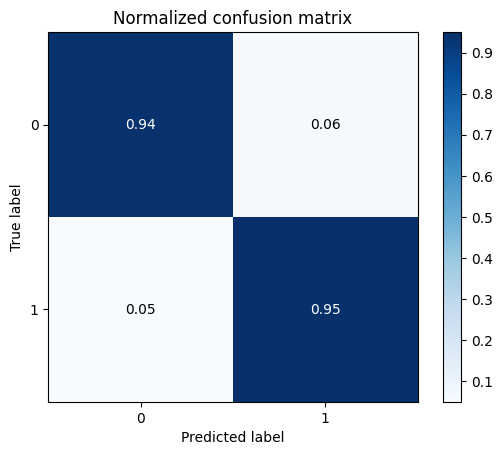

In [ ]:
# Train the model
model = RunModel(Dt,X_train,y_train, X_test,y_test,4)

In [ ]:
# Save the trained model to a file
dump(model, 'DecisionTree.joblib')

['DecisionTree.joblib']

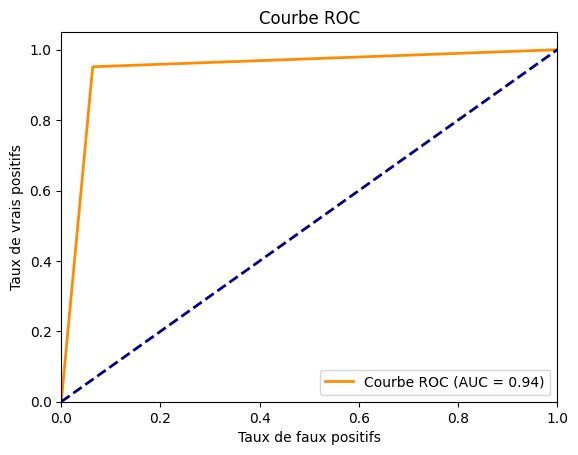

In [ ]:
ROC(Dt,X_train,y_train, X_test,y_test)

# Random Foreset

In [ ]:
rfc = RandomForestClassifier()

Model : RandomForestClassifier()
Accuracy :  0.9713838825495006
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     14113
           1       1.00      0.95      0.97     14018

    accuracy                           0.97     28131
   macro avg       0.97      0.97      0.97     28131
weighted avg       0.97      0.97      0.97     28131



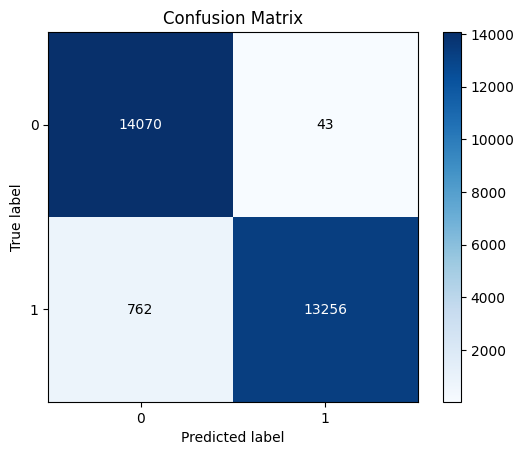

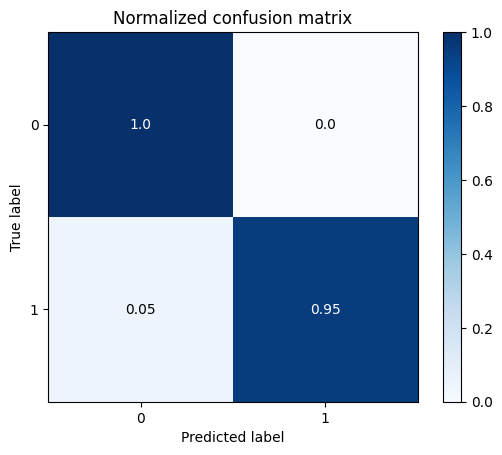

In [ ]:
# Train the model
model = RunModel(rfc,X_train,y_train, X_test,y_test,5)

In [ ]:
# Save the trained model to a file
dump(model, 'RandomForest.joblib')

['RandomForest.joblib']

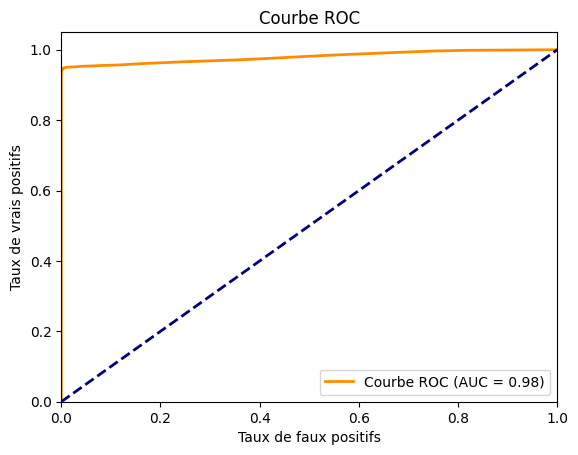

In [ ]:
ROC(rfc,X_train,y_train, X_test,y_test)

# Extra Trees

In [ ]:
etc = ExtraTreesClassifier(n_estimators=100, max_depth=4)

Model : ExtraTreesClassifier(max_depth=4)
Accuracy :  0.8135153389499129
              precision    recall  f1-score   support

           0       0.74      0.96      0.84     14113
           1       0.94      0.67      0.78     14018

    accuracy                           0.81     28131
   macro avg       0.84      0.81      0.81     28131
weighted avg       0.84      0.81      0.81     28131



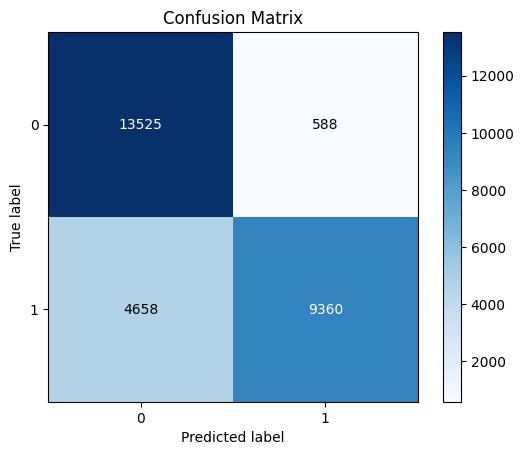

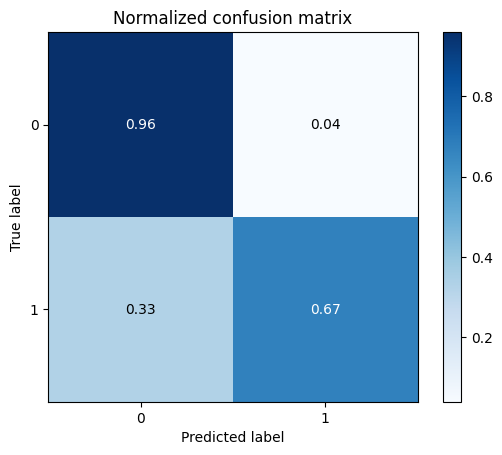

In [ ]:
# Train the model
model = RunModel(etc,X_train,y_train, X_test,y_test,6)

In [ ]:
# Save the trained model to a file
dump(model, 'ExtraTree.joblib')

['ExtraTree.joblib']

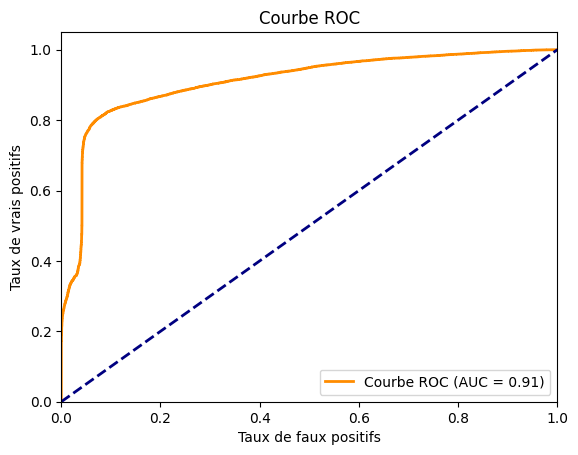

In [ ]:
ROC(etc,X_train,y_train, X_test,y_test)

# Gausian Naive bayes

In [ ]:
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
GNB = GaussianNB()

Model : GaussianNB()
Accuracy :  0.7270982190466034
              precision    recall  f1-score   support

           0       0.65      1.00      0.79     14113
           1       1.00      0.45      0.62     14018

    accuracy                           0.73     28131
   macro avg       0.82      0.73      0.70     28131
weighted avg       0.82      0.73      0.70     28131



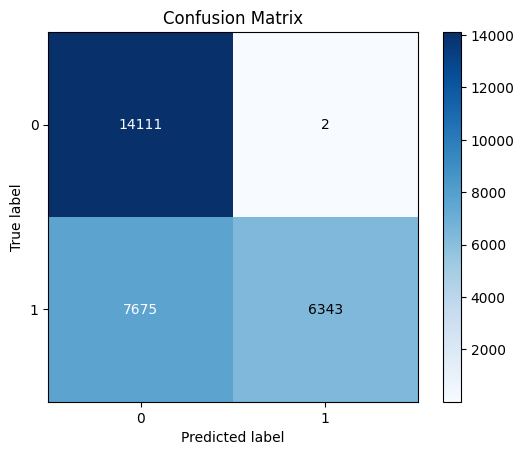

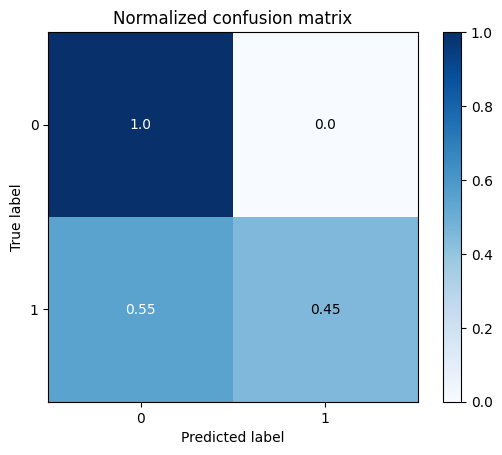

In [ ]:
# Train the model
model = RunModel(GNB,X_train,y_train, X_test,y_test,7)

In [ ]:
# Save the trained model to a file
dump(model, 'GNB.joblib')

['GNB.joblib']

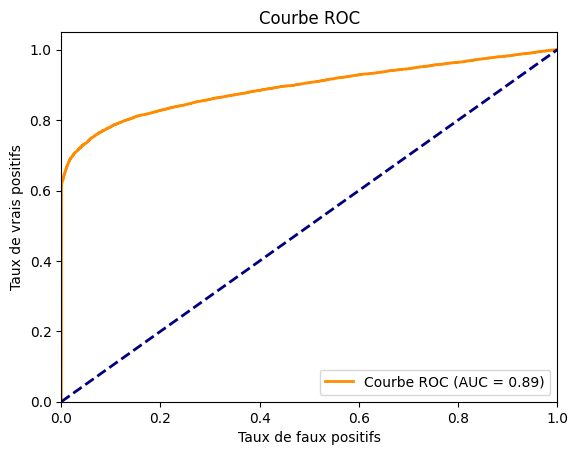

In [ ]:
ROC(GNB,X_train,y_train, X_test,y_test)

# eExtreme gradient boosting

In [ ]:
EXGB = xgb.XGBClassifier()

Model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy :  0.9728768973730049
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     14113
           1       1.00      0.95      0.97     14018

    accuracy                           0.97  

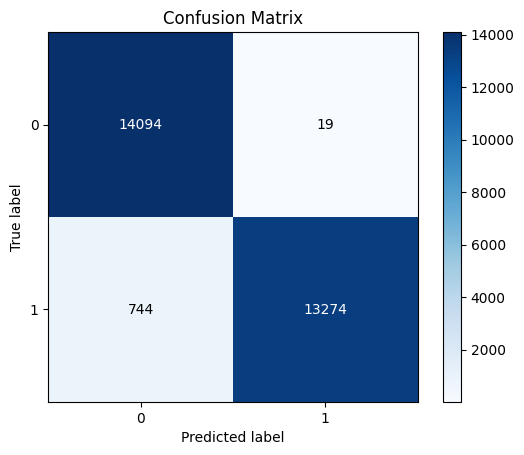

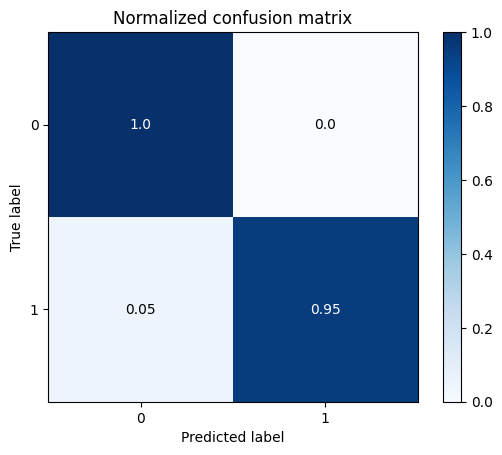

In [ ]:
# Train the model
model = RunModel(EXGB,X_train,y_train, X_test,y_test,8)

In [ ]:
# Save the trained model to a file
dump(model, 'EXHB.joblib')

['EXHB.joblib']

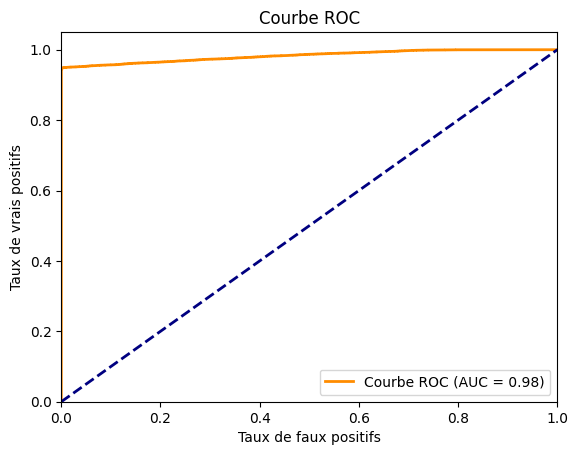

In [ ]:
ROC(EXGB,X_train,y_train, X_test,y_test)

# Neural network

In [ ]:
# Split the data into training and test sets
X = data.drop('CLASS', axis=1).values
y = data['CLASS'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for input into the CNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
print(X_train.shape)

(112523, 28)


In [ ]:
# Build the deep CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPool1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='isFraud')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
3517/3517 [==============================] - 13s 3ms/step - loss: 0.2355 - accuracy: 0.9142
Epoch 2/10
3517/3517 [==============================] - 11s 3ms/step - loss: 0.1810 - accuracy: 0.9406
Epoch 3/10
3517/3517 [==============================] - 11s 3ms/step - loss: 0.1696 - accuracy: 0.9452
Epoch 4/10
3517/3517 [==============================] - 11s 3ms/step - loss: 0.1628 - accuracy: 0.9478
Epoch 5/10
3517/3517 [==============================] - 12s 3ms/step - loss: 0.1586 - accuracy: 0.9494
Epoch 6/10
3517/3517 [==============================] - 12s 3ms/step - loss: 0.1556 - accuracy: 0.9506
Epoch 7/10
3517/3517 [==============================] - 11s 3ms/step - loss: 0.1522 - accuracy: 0.9518
Epoch 8/10
3517/3517 [==============================] - 12s 3ms/step - loss: 0.1502 - accuracy: 0.9527
Epoch 9/10
3517/3517 [==============================] - 12s 3ms/step - loss: 0.1489 - accuracy: 0.9533
Epoch 10/10
3517/3517 [==============================] - 12s 3ms/step - l

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

880/880 [==============================] - 2s 2ms/step - loss: 0.1430 - accuracy: 0.9557
Test Accuracy: 0.9557072520256042


In [ ]:
start_time = time.time()  # record start time 
# Get predicted probabilities for test set
y_pred_proba = model.predict(X_test)
end_time = time.time()  # record end time
time_taken = end_time - start_time  # calculate time taken
# Convert predicted probabilities to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy_s = accuracy_score(y_test, y_pred) # calculate performance score
recall_s = recall_score(y_pred, y_test,average='macro') #Recall score
f1_s = f1_score(y_test, y_pred,average='macro')
performance.append({'Model': 'CNN', 'Accuracy': accuracy_s, 'Recall': recall_s, 'F1': f1_s, 'time': time_taken})  # record performance
print('Accuracy score : ',accuracy_s )
print('Recall score : ',recall_s )
print('F1 score : ',f1_s )

880/880 [==============================] - 1s 2ms/step
Accuracy score :  0.9557072269027052
Recall score :  0.9586534276148162
F1 score :  0.9556263469559523


In [ ]:
# Save the trained model to a file
model.save("cnn.h5")

880/880 [==============================] - 2s 2ms/step


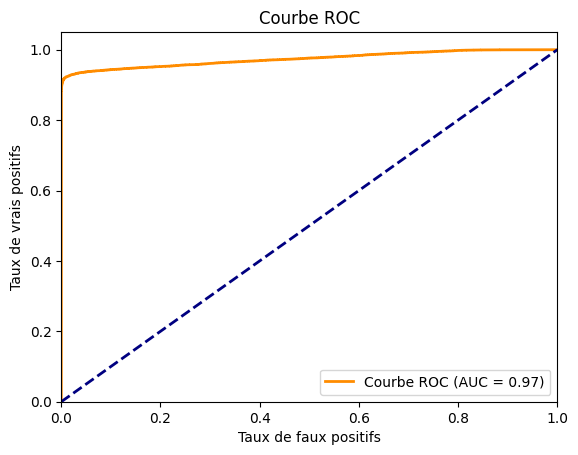

In [ ]:
pred = model.predict(X_test)
# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
# Afficher la courbe ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

880/880 [==============================] - 1s 2ms/step


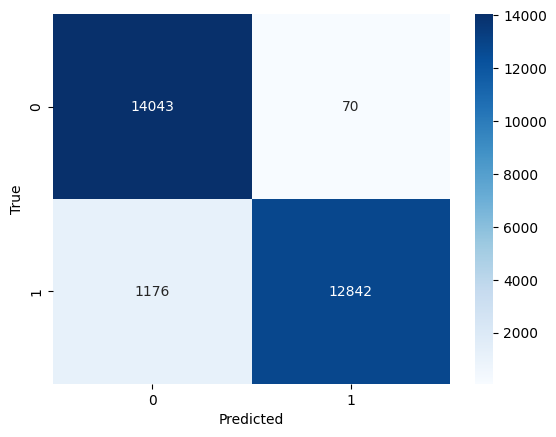

In [ ]:
# Get predicted probabilities for test set
y_pred_proba = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

880/880 [==============================] - 1s 2ms/step


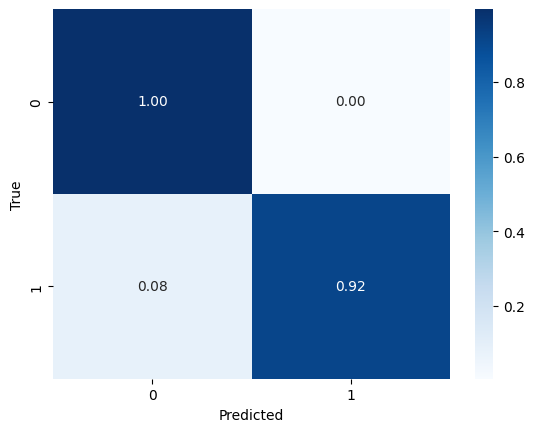

In [ ]:
# Get predicted probabilities for test set
y_pred_proba = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# comparaison des performances

In [ ]:
# Print the performance of each model
for p in performance:
    print('Model:', p['Model'])
    print('Accuracy Score:', p['Accuracy'])
    print('Recall score:', p['Recall'])
    print('F1 score:', p['F1'])
    print('Time Taken:', p['time'])
    print()


Model: LogisticRegression
Accuracy Score: 0.6393582482166978
Recall score: 0.639865113708897
F1 score: 0.6389511093497049
Time Taken: 0.007869482040405273

Model: K nearest Neighbour
Accuracy Score: 0.6605208901106714
Recall score: 0.6657285021920926
F1 score: 0.6576412366521216
Time Taken: 31.850220918655396

Model: Linear Discriminant Analysis
Accuracy Score: 0.7762255163342932
Recall score: 0.8176633556429658
F1 score: 0.769241333346929
Time Taken: 0.01018071174621582

Model: Support Vector Machines
Accuracy Score: 0.9012194071009997
Recall score: 0.9146495855738052
F1 score: 0.90038146885903
Time Taken: 95.71611976623535

Model: Decision Tree
Accuracy Score: 0.9438342042586471
Recall score: 0.9439163963171068
F1 score: 0.9438331991725417
Time Taken: 0.00655817985534668

Model: Random Foreset
Accuracy Score: 0.9713838825495006
Recall score: 0.9726956348276423
F1 score: 0.9713599023405572
Time Taken: 0.6050088405609131

Model: Extra Trees
Accuracy Score: 0.8135153389499129
Recall sco

In [ ]:
import pickle

# le nom du fichier dans lequel la liste sera enregistrée
file_name = 'performance.pkl'

# enregistrement de la liste dans le fichier
with open(file_name, 'wb') as file:
    pickle.dump(performance, file)

In [ ]:
#Creating data frame with Column Names
comparision = pd.DataFrame (performance, columns = ['Model','Accuracy','Recall','F1','time'])
comparision

,Model,Accuracy,Recall,F1,time
0,LogisticRegression,0.639358,0.639865,0.638951,0.007869
1,K nearest Neighbour,0.660521,0.665729,0.657641,31.850221
2,Linear Discriminant Analysis,0.776226,0.817663,0.769241,0.010181
3,Support Vector Machines,0.901219,0.914650,0.900381,95.716120
4,Decision Tree,0.943834,0.943916,0.943833,0.006558
5,Random Foreset,0.971384,0.972696,0.971360,0.605009
6,Extra Trees,0.813515,0.842360,0.809336,0.186558
7,Gausian Naive bayes,0.727098,0.823697,0.704571,0.014542
8,eExtreme gradient boosting,0.972877,0.974215,0.972854,0.126725
9,CNN,0.955707,0.958653,0.955626,2.720740


In [ ]:
print("Accuracy maximum : ", comparision["Accuracy"].max())
print("Recall maximum : ", comparision["Recall"].max())
print("F1 maximum : ", comparision["F1"].max())
print("time maximum : ", comparision["time"].max())

Accuracy maximum :  0.9728768973730049
Recall maximum :  0.9742145738939548
F1 maximum :  0.9728538317122403
time maximum :  95.71611976623535


In [ ]:
print("Accuracy minimum : ", comparision["Accuracy"].min())
print("Recall minimum : ", comparision["Recall"].min())
print("F1 minimum : ", comparision["F1"].min())
print("time minimum : ", comparision["time"].min())

Accuracy minimum :  0.6393582482166978
Recall minimum :  0.639865113708897
F1 minimum :  0.6389511093497049
time minimum :  0.00655817985534668


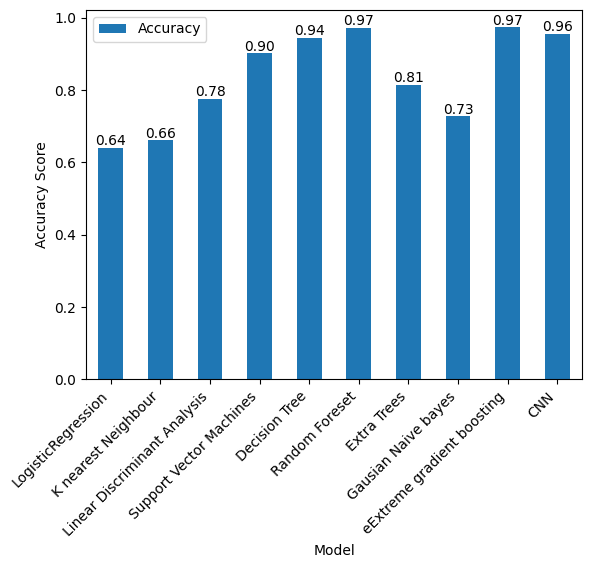

In [ ]:
# Set Model column as index
comparision.set_index('Model', inplace=True)

# Plot accuracy comparison graph
ax = comparision.plot(kind='bar', y='Accuracy', rot=0)
ax.set_ylabel('Accuracy Score')

# Ajouter le texte associé à chaque barre de l'axe X
for i, val in enumerate(comparision['Accuracy']):
    ax.annotate("{:.2f}".format(val), xy=(i, val), va='bottom', ha='center')

# Modifier les étiquettes de l'axe X
ax.set_xticklabels(comparision.index, rotation=45, ha='right')

# Afficher le graphique
plt.show()


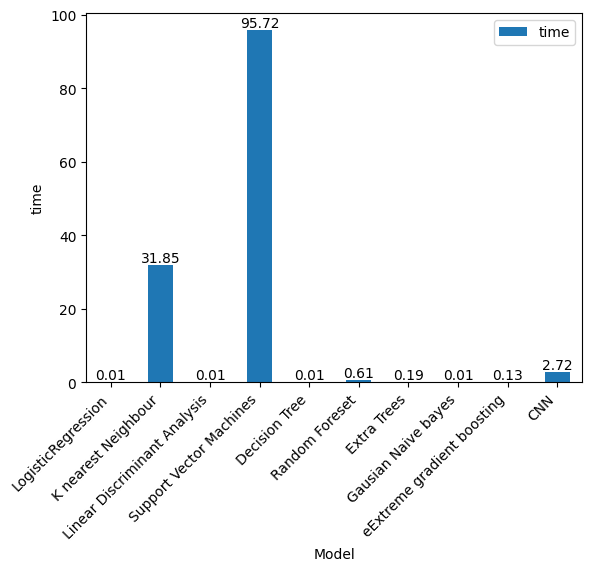

In [ ]:
# Set Model column as index
comparision.set_index('Model', inplace=True)

# Plot accuracy comparison graph
ax = comparision.plot(kind='bar', y='time', rot=0)
ax.set_ylabel('time')

# Ajouter le texte associé à chaque barre de l'axe X
for i, val in enumerate(comparision['time']):
    ax.annotate("{:.2f}".format(val), xy=(i, val), va='bottom', ha='center')

# Modifier les étiquettes de l'axe X
ax.set_xticklabels(comparision.index, rotation=45, ha='right')

# Afficher le graphique
plt.show()
